In [1]:
# Reinforcement learning
# Multi-amred bandit problem - random selection vs my own improvised model

# We have 10 ad channels and 10000 instances, objective is to maximize selection of ads
# Each Ad channel has its own probabilty distribution function

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyMachineLearning/master/Part6-1.Reinforcement%20Learning-Upper%20Confidence%20Bound/Ads_CTR_Optimisation.csv -o Ads_CTR_Optimisation.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  205k  100  205k    0     0  1486k      0 --:--:-- --:--:-- --:--:-- 1486k


In [2]:
# Importing the dataset
# There are 10000 instances, with 10 Ad channels
# Each Ad channel has its own probabilty distribution function
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
#Probabilities of ads from Ad1 to Ad10
prob1=[]
for i in range(len(dataset.columns)):
  prob1.append(dataset.values[:,i].sum()/10000)
prob1=np.array(prob1)
prob=pd.DataFrame(data=prob1, index=dataset.columns, columns=['Prob'])
prob=prob.reset_index()
prob

,index,Prob
0,Ad 1,0.1703
1,Ad 2,0.1295
2,Ad 3,0.0728
3,Ad 4,0.1196
4,Ad 5,0.2695
5,Ad 6,0.0126
6,Ad 7,0.1112
7,Ad 8,0.2091
8,Ad 9,0.0952
9,Ad 10,0.0489


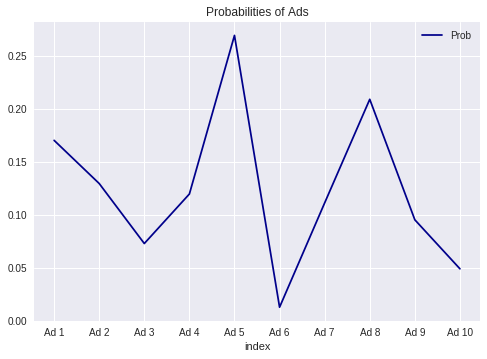

In [4]:
prob.plot(kind='line', x='index', y='Prob', c='DarkBlue' , xticks=range(10),title='Probabilities of Ads')

In [5]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

total_reward

1250

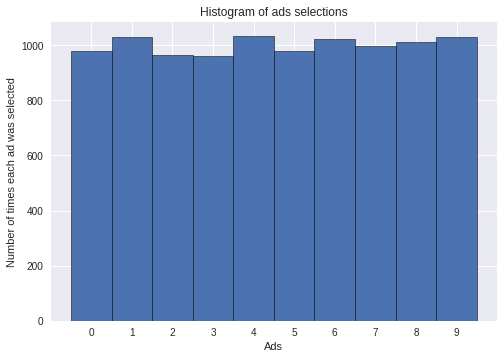

In [6]:
# Visualising the results
# As we can see, the selection is purely random and does not favour any channel
plt.hist(ads_selected,edgecolor='black', linewidth=0.5, bins=(np.arange(11) - 0.5))
plt.xticks(range(10))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [7]:
# My own implementation of reinforement learning with improvised reward function
# We can see the total reward has almost doubled
import random
N = 10000
d = 10
ad_pool = [0,1,2,3,4,5,6,7,8,9]
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.choice(ad_pool)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
    if reward ==1:
      ad_pool.append(ad)
    else:
      pass

total_reward

2385

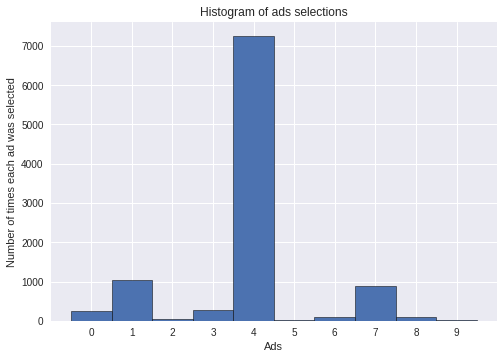

In [8]:
# Visualising the results
# We see the ad selection follows the probability distribution of the ad channels
plt.hist(ads_selected,edgecolor='black', linewidth=0.5, bins=(np.arange(11) - 0.5))
plt.xticks(range(10))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [9]:
# The previous model was good, now we implement the 'greedy' method to it, we want to ensure we keep choosing the best model after n=5000 trials

import random
N1 = 5000
N2 = 5000
d = 10
ad_pool = [0,1,2,3,4,5,6,7,8,9]
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.choice(ad_pool)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
    if reward ==1:
      ad_pool.append(ad)
    else:
      pass


for n in range(0, N2):
  ad = max(set(ads_selected), key=ads_selected.count)
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  total_reward = total_reward + reward
  
print(ad)
total_reward

4


2543

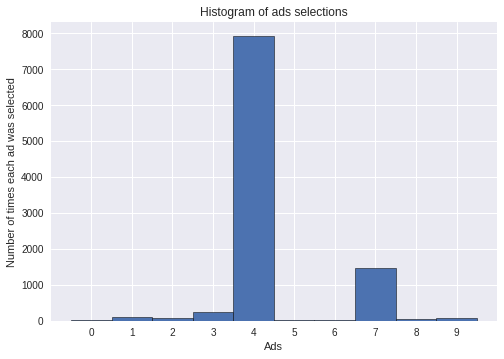

In [10]:
# Visualising the results
#We see that there is a small improvement, yet increased risk of choosing the incorrect 'best model' if N1 is small
plt.hist(ads_selected,edgecolor='black', linewidth=0.5, bins=(np.arange(11) - 0.5))
plt.xticks(range(10))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()